<a href="https://colab.research.google.com/github/va18/Projects/blob/main/leaf_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
dataset_path = '/content/drive/MyDrive/leaf_sample'  # Update with your dataset path
output_path = 'output'

# Image data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(dataset_path, target_size=(299, 299), batch_size=32, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(dataset_path, target_size=(299, 299), batch_size=32, class_mode='categorical', subset='validation')


Found 96 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10
3/3 [==============================] - 66s 20s/step - loss: 0.7719 - accuracy: 0.4375 - val_loss: 0.7331 - val_accuracy: 0.4783
Epoch 2/10
3/3 [==============================] - 33s 11s/step - loss: 0.7710 - accuracy: 0.4583 - val_loss: 0.7242 - val_accuracy: 0.4783
Epoch 3/10
3/3 [==============================] - 33s 11s/step - loss: 0.7051 - accuracy: 0.4688 - val_loss: 0.7220 - val_accuracy: 0.4783
Epoch 4/10
3/3 [==============================] - 33s 11s/step - loss: 0.7073 - accuracy: 0.4896 - val_loss: 0.7365 - val_accuracy: 0.4783
Epoch 5/10
3/3 [==============================] - 33s 11s/step - loss: 0.7065 - accuracy: 0.5000 - val_loss: 0.7462 - val_accuracy: 0.4783
Epoch 6/10
3/3 [==============================] - 33s 11s/step - loss: 0.6987 - accuracy: 0.4688 - val_loss: 0.7410 - val_accuracy: 0.4783
Epoch 7/10
3/3 [==============================] - 37s 13s/step - loss: 0.7026 - accuracy: 0.4688 - val_loss: 0.7558 - val_accuracy: 0.4783
Epoch 8/10
3/3 [===========

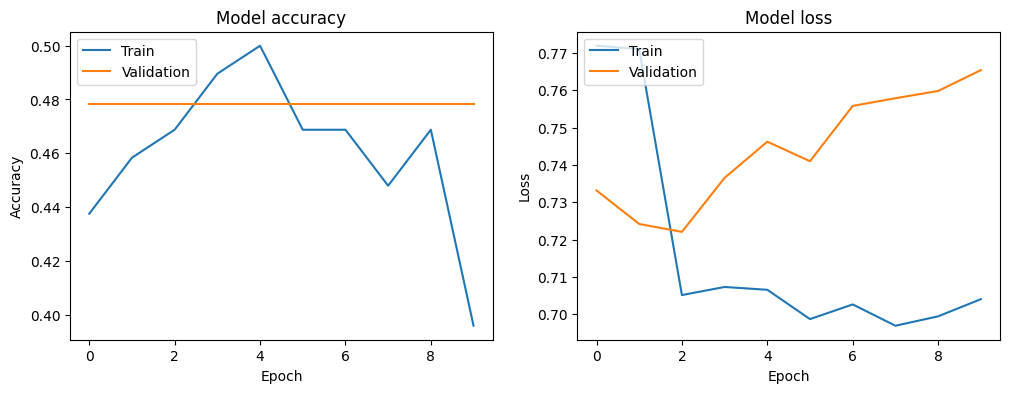

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)


In [ ]:
model.save('spice_leaf_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def predict_disease(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))  # Resize image to 299x299
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)

    # Map predicted class index to class label
    class_labels = {0: 'Fungal Disease', 1: 'Pesticide Effect', 2: 'Healthy'}  # Update with your class labels
    predicted_label = class_labels[predicted_class[0]]

    # Create a directory for the predicted label if it doesn't exist
    predicted_label_dir = os.path.join('predicted_images', predicted_label)
    if not os.path.exists(predicted_label_dir):
        os.makedirs(predicted_label_dir)

    # Copy the image to the predicted label directory
    img_name = os.path.basename(img_path)
    shutil.copy(img_path, os.path.join(predicted_label_dir, img_name))

    return predicted_label

# Example usage: Predict disease on a new image
img_path = '/content/drive/MyDrive/resize image/Curry_patta14.jpg'  # Update with path to new image
predicted_disease = predict_disease(img_path, model)
print(f"Predicted Disease: {predicted_disease}")


1/1 [==============================] - 2s 2s/step
Predicted Disease: Fungal Disease
